# DBSCAN

밀도 기반 군집화의 대표적인 알고리즘.

간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능.

**입실론 주변 영역(epsilon):** 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

**최소 데이터 개수(min points):** 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

**핵심 포인트(Core Point):** 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트 라고 함.

**이웃 포인트(Neighbor Point):** 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함.

**경계 포인트(Border Point):** 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경게 포인트라고함.

**잡음 포인트(Noise Point):** 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함.

사이킷런의 DBSCAN 클래스 파라미터

**eps:** 입실론 주변 영역의 반경을 의미

**min_samples:** 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미.(자신의 데이터 포함)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
iris = load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=features_names)
dbscan = DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

-1 인 것은 노이즈에 속하는 군집을 의미.

In [22]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

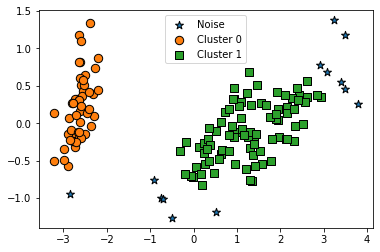

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF, 'dbscan_cluster',iscenter=False)

별표는 모두 노이즈. DBSCAN을 적용할 떄는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음.

적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요함.

일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐.

min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터의 개수가 커지게 됨.

데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문.

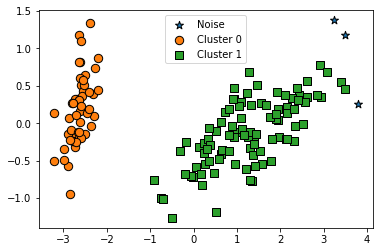

In [27]:
dbscan = DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result
visualize_cluster_plot(dbscan,irisDF, 'dbscan_cluster',iscenter=False)

eps를 0.8로 증가시키자 노이즈 데이터 수가 줄어듦

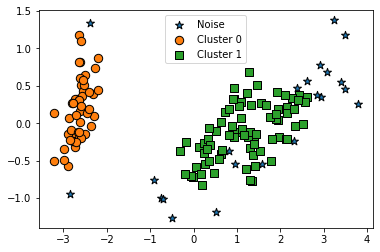

In [28]:
dbscan = DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result
visualize_cluster_plot(dbscan,irisDF, 'dbscan_cluster',iscenter=False)

min_samples를 16으로 늘리자 노이즈 데이터가 기존보다 많이 증가함

In [29]:
from sklearn.datasets import make_circles

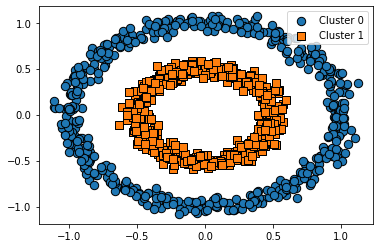

In [37]:
X,y = make_circles(n_samples=1000,shuffle=True, noise=0.05, random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF, 'target',iscenter=False)

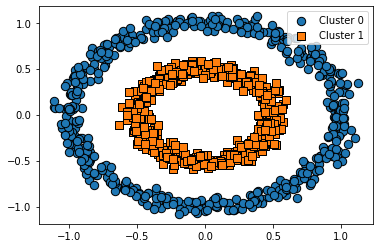

In [31]:
dbscan = DBSCAN(eps=0.2, min_samples=10,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(None,clusterDF, 'target',iscenter=False)

# 군집화 정리

**K-평균:** 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 쉽고 직관적인 알고리즘으로 많은 군집화 애플리케이션에서 애용, 복잡한 구조를 가지는 데이터 세트에는 적용하기에는 한계가 있으며, 군집의 개수를 최적화하기가 어려움. 평가를 위해 실루엣 계수를 이용.

**평균 이동:** K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀ㄹ도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화 수행. 정형 데이터 세트보다는 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘.

**GMM:** 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 섞어서 생성된 모델로 가정해 수행하는 방식. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트에 각각 군집화 하는 것. GMM의 경우 K-평균보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점과 수행 시간이 오래 걸린다는 단점이 있음.

**DBSCAN:** 밀도 기반 군집화의 대표적인 알고리즘. 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식. DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함.